### Import libraries

In [1]:
import numpy as np

from functools import partial
from numba import njit

from pathlib import Path
import os, sys

SRC_DIR = str(Path('.').resolve().parents[1])
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

import utils

### First Chi2 estimation for window

In [2]:
chi2_calculator = utils.Chi2Calculator(N=5, is_highres=False, rsd=True, bao=True, pantheon=True, desy3=True)
chi2_calculator = utils.Chi2Calculator(N=2, is_highres=False, rsd=True, pantheon=True)

In [3]:
# chi2_calculator(id_grid=1)
chi2_calculator.save_grid(id_grid=1)

/home/vicpabo/Documents/Projects/Stage-irap/programs/output/2-PR/lowres


In [13]:
params_used = chi2_calculator.chi2_grid.get_params_used([False, False, False, True, False, True])
initial_params = {"omega_m":utils.OMEGAM_0, "sigma_8":utils.SIGMA_8_0, "gamma":utils.GAMMA, "rd":utils.RD, "H0":utils.H0, "M":utils.M}

minimizer = utils.chi2_functions.get_minimizer(chi2_calculator.chi2_func, params_used, initial_params)
result = minimizer.migrad()

utils.chi2_functions.display_minimizer(minimizer)
print(result)

Fit results (Chi2 = 1739.451):
omega_m = 0.213 ± 0.007
sigma_8 = 0.703 ± 0.050
gamma = 0.310 ± 0.084
rd = 147.400 ± 1.474
H0 = 74.132 ± 0.169
M = -19.250 ± 0.193
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1739                       │              Nfcn = 123              │
│ EDM = 7.7e-07 (Goal: 0.0002)     │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└─

### Plot

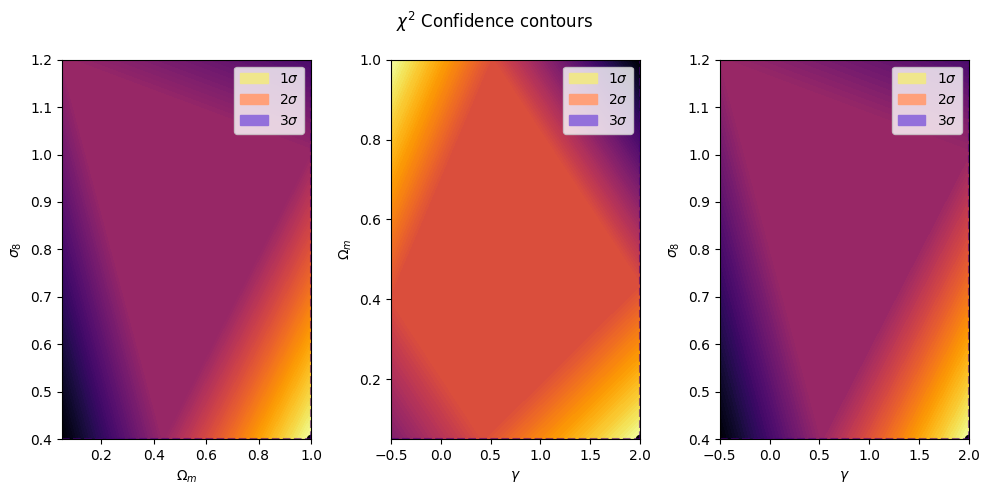

In [4]:
chi2_calculator.plot_grids(savefig=False)